In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airline = pd.read_excel("AirlinesData.xlsx")

In [3]:
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
airline.shape

(96, 2)

In [5]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
airline["Month"].unique()

array(['1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-05-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1996-08-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-10-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-04-01

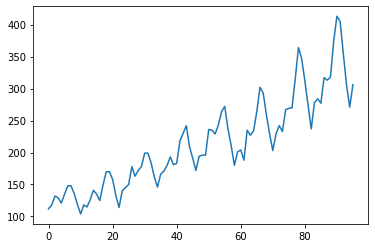

In [7]:
airline.Passengers.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020447FA7AF0>]],
      dtype=object)

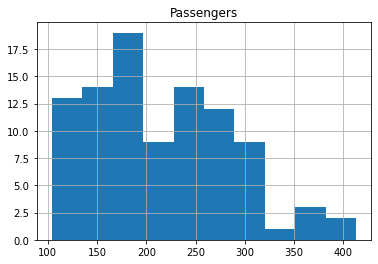

In [8]:
airline.hist()

In [9]:
airline["Date"]=pd.to_datetime(airline.Month,format="%b-%y")
airline["Months"]=airline.Date.dt.strftime("%b")
airline["Year"]=airline.Date.dt.strftime("%Y")

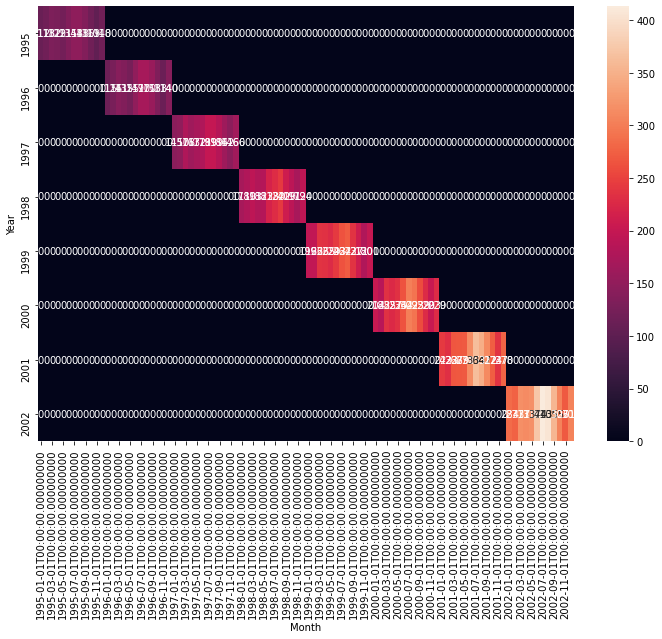

In [10]:
# Heatmap
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airline,values="Passengers",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


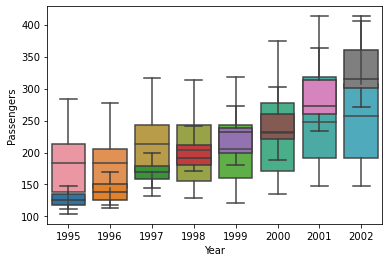

In [11]:
sns.boxplot(x="Months",y="Passengers",data=airline)
sns.boxplot(x="Year",y="Passengers",data=airline)

In [12]:
Month_Dummies = pd.DataFrame(pd.get_dummies(airline['Months']))
airline1 = pd.concat([airline,Month_Dummies],axis = 1)

In [13]:
airline1["t"] = np.arange(1,97)
airline1["t_squared"] = airline1["t"]*airline1["t"]
airline1["Log_Passengers"] = np.log(airline1["Passengers"])

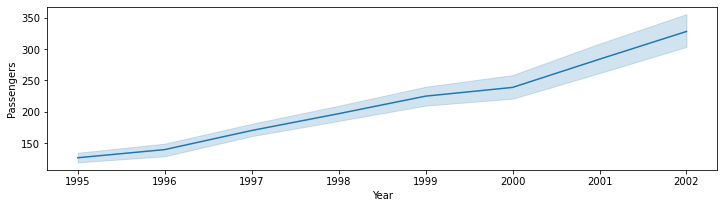

In [14]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=airline)

In [15]:

Train = airline1.head(80)
Test = airline1.tail(16)


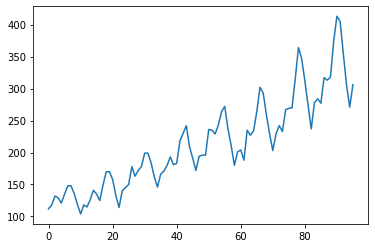

In [16]:
airline1.Passengers.plot()

In [17]:
# Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear


47.542624067726734

In [18]:

# Exponential Model
Exp = smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


43.793739393343294

In [19]:

# Quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584208

In [20]:
# Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.2664764144332

In [21]:
# Addictive Seasonality Quadratic
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570107437

In [22]:
# Multiplicative Seasonality
Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621127

In [23]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

9.469000230305895

### Testing the Models

In [24]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,47.542624
1,rmse_Exp,43.793739
2,rmse_Quad,43.654404
3,rmse_add_sea,129.266476
4,rmse_add_sea_quad,23.910984
5,rmse_Mult_sea,135.326484
6,rmse_Mult_add_sea,9.469000


In [28]:
air_new = pd.read_excel("Airlines_new.xlsx")

In [29]:
air_new

,Month,t,t_square
0,2003-01-01,97,9409
1,2003-01-02,98,9604
2,2003-01-03,99,9801
3,2003-01-04,100,10000
4,2003-01-05,101,10201
5,2003-01-06,102,10404
6,2003-01-07,103,10609
7,2003-01-08,104,10816
8,2003-01-09,105,11025
9,2003-01-10,106,11236


### Build the model on entire Dataset

In [30]:
model_full = smf.ols('Passengers~t',data=airline1).fit()
pred_new  = pd.Series(model_full.predict(air_new))
pred_new

0     326.941886
1     329.276598
2     331.611311
3     333.946023
4     336.280736
5     338.615448
6     340.950161
7     343.284873
8     345.619585
9     347.954298
10    350.289010
11    352.623723
12    354.958435
13    357.293147
14    359.627860
dtype: float64

In [31]:
air_new["forecasted_passengers"]=pd.Series(pred_new)

In [32]:
air_new

,Month,t,t_square,forecasted_passengers
0,2003-01-01,97,9409,326.941886
1,2003-01-02,98,9604,329.276598
2,2003-01-03,99,9801,331.611311
3,2003-01-04,100,10000,333.946023
4,2003-01-05,101,10201,336.280736
5,2003-01-06,102,10404,338.615448
6,2003-01-07,103,10609,340.950161
7,2003-01-08,104,10816,343.284873
8,2003-01-09,105,11025,345.619585
9,2003-01-10,106,11236,347.954298


In [ ]:
## From the above we can say rmse_multi_add_sea(9.469000) RMSE value is lower than any other model so multi add seasonality is best fitted model 